In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
data_path = "../data/xls/"
filename = lambda number: f"22MAG_HW_1_v{number}.xls"
variants = range(1, 16)
columns = [
    "Age (years)",
    "Family size",
    "Monthly income (RUB)",
    "Residence in the region (years)",
    "Car valuation (USD)",
    "Loan amount (x1000 RUB)",
]
dtypes = [
    int,
    int,
    float,
    float,
    float,
    int,
]
types_dict = {elem[0]: elem[1] for elem in zip(columns, dtypes)}

def read_specific_variant(number: int) -> pd.DataFrame:
    return pd.read_excel(data_path + filename(number), header=None, names=columns)

def read_all_variants() -> pd.DataFrame:
    result = pd.DataFrame(columns=columns)
    for var in variants:
        add = read_specific_variant(var)
        result = result.append(add, ignore_index=True)
    result = result.copy()
    return result

In [12]:
df = read_all_variants()
df.head()

,Age (years),Family size,Monthly income (RUB),Residence in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
0,38.0,2.0,22600.0,8.0,22000.0,NaN
1,47.0,2.0,11200.0,14.0,12000.0,119000.0
2,NaN,2.0,22500.0,9.0,22000.0,224000.0
3,51.0,3.0,16000.0,17.0,18000.0,173000.0
4,41.0,2.0,NaN,11.0,6000.0,57000.0


In [13]:
df.describe()

,Age (years),Family size,Monthly income (RUB),Residence in the region (years),Car valuation (USD),Loan amount (x1000 RUB)
count,699.000000,703.000000,702.000000,706.000000,702.000000,705.000000
mean,39.110157,2.021337,19445.299145,10.172805,21173.789174,201406.099291
std,8.784145,1.013217,9877.044344,4.828538,11278.272303,97600.870198
min,19.000000,0.000000,700.000000,0.000000,0.000000,3000.000000
25%,33.000000,1.000000,11300.000000,6.000000,13000.000000,127000.000000
50%,39.000000,2.000000,19550.000000,10.000000,20000.000000,200000.000000
75%,45.000000,3.000000,27850.000000,13.750000,29000.000000,274000.000000
max,60.000000,5.000000,43300.000000,22.000000,50000.000000,437000.000000


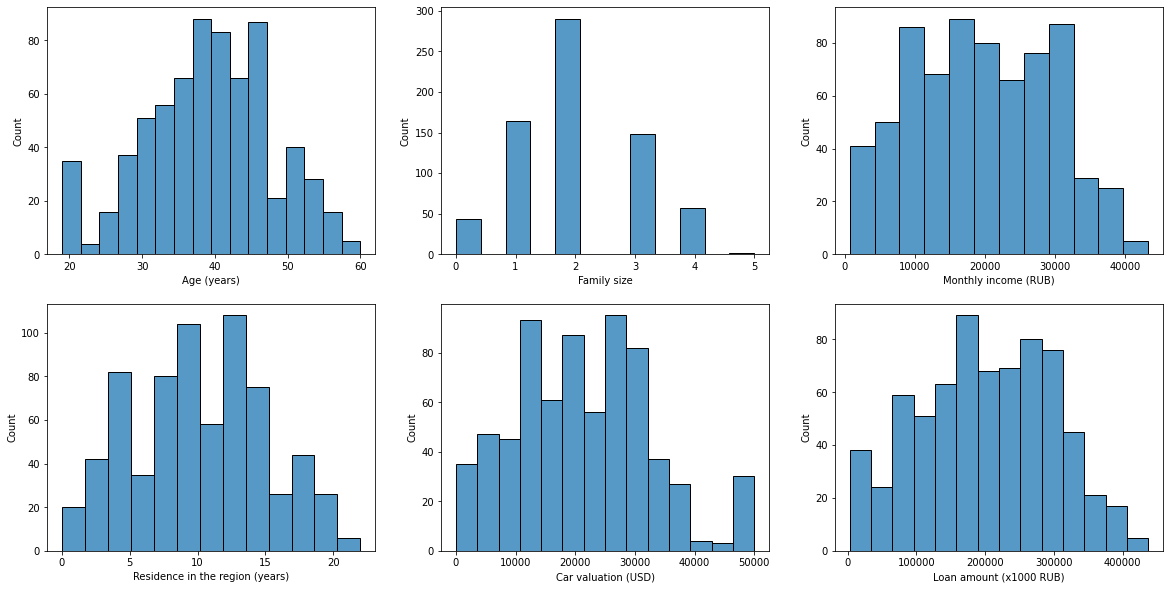

In [18]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20,10)

for i in range(6):
    sns.histplot(data=df, x=columns[i], ax=np.ravel(axs)[i])

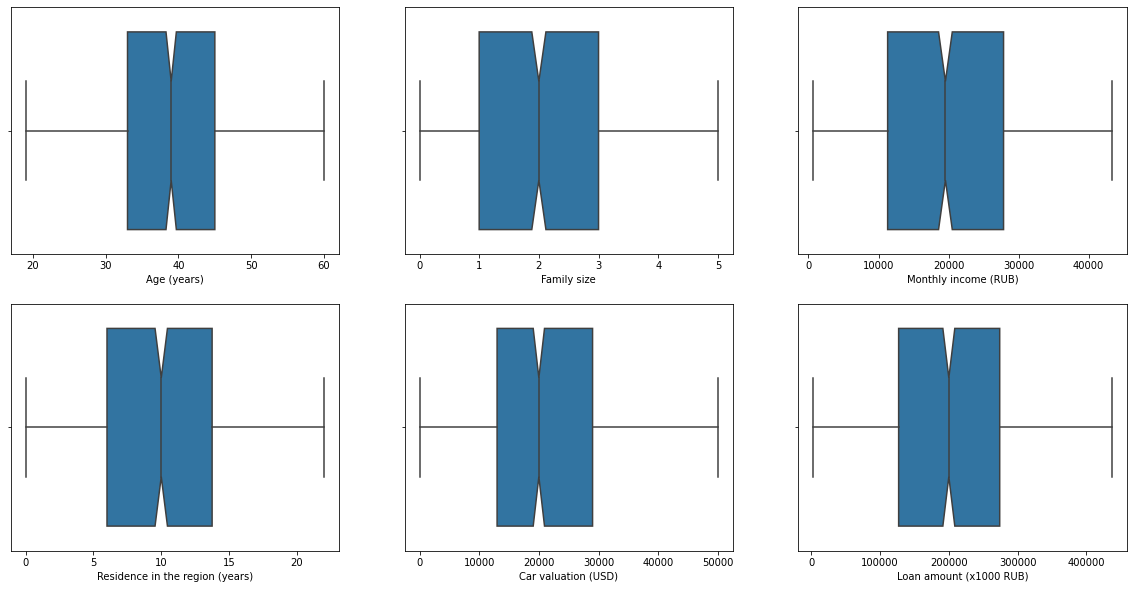

In [21]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20,10)

for i in range(6):
    sns.boxplot(data=df, x=columns[i], ax=np.ravel(axs)[i], notch=True)